In [1]:
# import dependencies
import os
import glob
import pandas as pd
import numpy as np
import itertools
import category_encoders as ce
import json

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Importing Eland and low-level Elasticsearch clients for comparison
import eland as ed
from eland.conftest import *
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search, Q

In [ ]:
"""
df['accessories'] = [str(x).split(" ") for x in df['accessories']]
attributes = df['accessories'].explode().unique() 
attributes"""

In [170]:
#df1.to_csv('flask-backend/data/cryptopunks_ohe.csv')

In [2]:
"""
os.chdir("flask-backend/data/sales")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv("punks_sales.csv", index=False, encoding='utf-8-sig')"""

In [167]:
"""
mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('accessories')),
                index=df.index,
                columns=mlb.classes_))"""

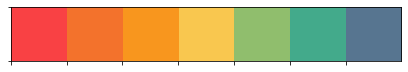

In [5]:
#Colors to be used in the plots
color = ["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

In [2]:
punk_id = pd.read_csv("flask-backend/data/id/punks_id.csv", index_col='id')
punk_id

,type,count,accessories
id,,,
0,Female,3,Green Eye Shadow / Earring / Blonde Bob
1,Male,2,Smile / Mohawk
2,Female,1,Wild Hair
3,Male,3,Wild Hair / Nerd Glasses / Pipe
4,Male,4,Big Shades / Wild Hair / Earring / Goat
...,...,...,...
9995,Female,2,Purple Eye Shadow / Straight Hair Dark
9996,Male,4,Cigarette / Earring / Crazy Hair / Smile
9997,Zombie,2,Front Beard / Cap Forward


In [3]:
punk_ohe = pd.read_csv("flask-backend/data/cryptopunks_ohe.csv")
punk_ohe

,id,Alien,...,Wild_White_Hair,None
0,0,0,...,0,0
1,1,0,...,0,0
2,2,0,...,0,0
3,3,0,...,0,0
4,4,0,...,0,0
...,...,...,...,...,...
9995,9995,0,...,0,0
9996,9996,0,...,0,0
9997,9997,0,...,0,0
9998,9998,0,...,1,0


In [4]:
punk_sales = pd.read_csv("flask-backend/data/punks_sales.csv", parse_dates=['timestamp'])
punk_sales.columns = punk_sales.columns.str.strip()
punk_sales

,timestamp,id,...,block,tx
0,2017-06-23 21:05:06+00:00,544,...,3919706,0xb28b5f2c186bf534e4fc4b8604b1496c9632e422694...
1,2017-06-23 21:10:32+00:00,3134,...,3919721,0x65579455ac3227e7b3db72b4e359e988bb16cae6d26...
2,2017-06-23 21:46:53+00:00,5056,...,3919847,0xd79cca9282c06a0edb8f9426aae734119f0f2ed0d96...
3,2017-06-23 21:57:45+00:00,5719,...,3919887,0x03c36b107006386b2db0e77667cc3fd4321d0366843...
4,2017-06-23 22:00:12+00:00,6548,...,3919893,0x85467bb2cbbdbea4542baa0307729e8a8c1a119dcf5...
...,...,...,...,...,...
10228,2021-04-05 12:40:33+00:00,717,...,12179722,0x409bd12e16ab9ecefa061d893cd8d1231439c2d7b22...
10229,2021-04-05 12:46:56+00:00,7909,...,12179750,0x07e09105e36acc4920a295f2acd4a6fbcff9c164192...
10230,2021-04-05 12:56:27+00:00,6021,...,12179788,0x0781d97ddc6ec7ec991ede5c66c294f92fd2e85dc7c...
10231,2021-04-05 13:09:03+00:00,5535,...,12179843,0x80c396162f33f628e7d901bf6426caa63a39c06d68b...


In [5]:
last_sales = punk_sales.sort_values(by=['timestamp']).drop_duplicates(subset='id', keep='last')
last_sales

,timestamp,id,...,block,tx
2,2017-06-23 21:46:53+00:00,5056,...,3919847,0xd79cca9282c06a0edb8f9426aae734119f0f2ed0d96...
16,2017-06-23 23:26:08+00:00,6318,...,3920190,0xfbf5a9f6097407f49ce579ca1a74a309f88eeb9fe97...
17,2017-06-23 23:31:47+00:00,4641,...,3920204,0x9ba97a949d47a54ddfe625d5d1cb4bb581a391a628d...
25,2017-06-24 02:08:08+00:00,5921,...,3920750,0x47612c75f711e13e171aff858a6a499455296a023e8...
27,2017-06-24 10:48:15+00:00,5138,...,3922521,0x26671b51f04a013dc15cd7ac6dfd930e6bcccb69513...
...,...,...,...,...,...
10228,2021-04-05 12:40:33+00:00,717,...,12179722,0x409bd12e16ab9ecefa061d893cd8d1231439c2d7b22...
10229,2021-04-05 12:46:56+00:00,7909,...,12179750,0x07e09105e36acc4920a295f2acd4a6fbcff9c164192...
10230,2021-04-05 12:56:27+00:00,6021,...,12179788,0x0781d97ddc6ec7ec991ede5c66c294f92fd2e85dc7c...
10231,2021-04-05 13:09:03+00:00,5535,...,12179843,0x80c396162f33f628e7d901bf6426caa63a39c06d68b...


In [6]:
df = pd.merge(last_sales, punk_ohe)
df.set_index('timestamp', inplace=True)
df

,id,price (in eth),...,Wild_White_Hair,None
timestamp,,,,,
2017-06-23 21:46:53+00:00,5056,0.1,...,0,0
2017-06-23 23:26:08+00:00,6318,0.107,...,0,0
2017-06-23 23:31:47+00:00,4641,0.2,...,0,0
2017-06-24 02:08:08+00:00,5921,0.36,...,0,0
2017-06-24 10:48:15+00:00,5138,0.5,...,0,0
...,...,...,...,...,...
2021-04-05 12:40:33+00:00,717,15.99,...,0,0
2021-04-05 12:46:56+00:00,7909,16.0,...,0,0
2021-04-05 12:56:27+00:00,6021,17.0,...,0,0


In [7]:
to_drop = ['tx', 'to', 'from', 'price (in wei)']
df = df.drop(columns=to_drop)
df['price (in eth)'] = pd.to_numeric(df['price (in eth)'], errors='coerce')
df['price (in eth)'] = np.nan_to_num(df['price (in eth)'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5094 entries, 2017-06-23 21:46:53+00:00 to 2021-04-05 13:20:35+00:00
Data columns (total 96 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5094 non-null   int64  
 1   price (in eth)        5094 non-null   float64
 2   block                 5094 non-null   int64  
 3   Alien                 5094 non-null   int64  
 4   Ape                   5094 non-null   int64  
 5   Female                5094 non-null   int64  
 6   Male                  5094 non-null   int64  
 7   Zombie                5094 non-null   int64  
 8   3D_Glasses            5094 non-null   int64  
 9   Bandana               5094 non-null   int64  
 10  Beanie                5094 non-null   int64  
 11  Big_Beard             5094 non-null   int64  
 12  Big_Shades            5094 non-null   int64  
 13  Black_Lipstick        5094 non-null   int64  
 14  Blonde_Bob            50

In [10]:
# target and features
target = 'price (in eth)'

X = df.drop(columns=target)
y = df[target]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75 ,random_state=11)

In [11]:
#mean of prices to create a line
y_pred = [y.mean()] * len(y)

#sklearn function to find mean abs error
mean_absolute_error(y, y_pred)

16.52728361281986

In [12]:
#Sklean function for linear regression
model_lr = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
model_lr.fit(X_train, y_train);

In [13]:
print('training MAE:', mean_absolute_error(y_train, model_lr.predict(X_train)))
print('test MAE:', mean_absolute_error(y_test, model_lr.predict(X_test)))

training MAE: 16.057283484073217
test MAE: 16.6281721396491


In [15]:
'''T9: Compare model metrics, R^2.'''
model_lr_r2_score = model_lr.score(X_test, y_test)
print('Linear Regression R^2:', model_lr_r2_score)

Linear Regression R^2: -1.7490471154147529


In [18]:
y_pred = model_lr.predict(X_test)
y_pred

array([  4.92926327,  10.47770557,  17.09888353, ..., -10.93160804,
        20.65488058,  17.98977373])

In [20]:
print('Test Accuracy: ', model_lr.score(X_test, y_test))

Test Accuracy:  -1.7490471154147529


In [18]:
# Define a function that compares the CV perfromance of a set of predetrmined models 
def cv_comparison(models, X, y, cv):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

In [19]:
# Create the models to be tested
mlr_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = xgb_regressor = xgb.XGBRegressor(random_state=42)

# Put the models in a list to be used for Cross-Validation
models = [mlr_reg, rf_reg, xgb_reg]

# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train, y_train, 4)

In [20]:
# Create DataFrame for all R^2s
r2_comp = pd.DataFrame(r2s, index=comp.columns, columns=['1st Fold', '2nd Fold', '3rd Fold', 
                                                         '4th Fold'])

# Add a column for the averages
r2_comp['Average'] = np.round(r2_comp.mean(axis=1),4)
r2_comp

,1st Fold,2nd Fold,3rd Fold,4th Fold,Average
"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",-146.6534,0.4424,0.4085,-0.0552,-36.4644
"RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',\n max_depth=None, max_features='auto', max_leaf_nodes=None,\n max_samples=None, min_impurity_decrease=0.0,\n min_impurity_split=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=42, verbose=0, warm_start=False)",-117.2811,0.5172,0.3636,0.4500,-28.9876
"XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,\n colsample_bynode=None, colsample_bytree=None, gamma=None,\n gpu_id=None, importance_type='gain', interaction_constraints=None,\n learning_rate=None, max_delta_step=None, max_depth=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n objective='reg:squarederror', random_state=42, reg_alpha=None,\n reg_lambda=None, scale_pos_weight=None, subsample=None,\n tree_method=None, validate_parameters=None, verbosity=None)",-147.8130,0.0120,0.0235,0.4291,-36.8371


In [21]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

In [22]:
# Create the model to be tuned
rf_base = RandomForestRegressor()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# View the best parameters from the random search
rf_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# Number of trees to be used
xgb_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

# Maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]

# Minimum number of instaces needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']

# Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

# Learning objective used
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}

In [ ]:
# Create the model to be tuned
xgb_base = xgb.XGBRegressor()

# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 15, cv = 3, verbose = 2, 
                                random_state = 420, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train, y_train)

# Get the optimal parameters
xgb_random.best_params_

In [ ]:
# Create the final Multiple Linear Regression
mlr_final = LinearRegression()

# Create the final Random Forest
rf_final = RandomForestRegressor(n_estimators = 100,
                                 min_samples_split = 6,
                                 min_impurity_decrease = 0.0,
                                 max_features = 'sqrt',
                                 max_depth = 25,
                                 criterion = 'mae',
                                 bootstrap = True,
                                 random_state = 42)

# Create the fnal Extreme Gradient Booster
xgb_final = xgb.XGBRegressor(tree_method = 'exact',
                         objective = 'reg:squarederror',
                         n_estimators = 1600,
                         min_child_weight = 6,
                         max_depth = 8,
                         gamma = 0,
                         eta = 0.1,
                         random_state = 42)

# Train the models using 80% of the original data
mlr_final.fit(X_train, y_train)
rf_final.fit(X_train, y_train)
xgb_final.fit(X_train, y_train)

In [ ]:
# Define a function that compares all final models
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return scores

In [ ]:
# Call the comparison function with the three final models
final_scores = final_comparison([mlr_final, rf_final, xgb_final], X_test, y_test)

# Adjust the column headers
final_scores.columns  = ['Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']